# Image Processing
Some basic image processing tests
References:
* https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/filter_2d/filter_2d.html
* https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d
* https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html

In [1]:
import cv2
import numpy as np
import scipy.signal as sig
from matplotlib import pyplot as plt

## IO

In [2]:
image = cv2.imread("Keras VGG Image Recognition - Test Image.jpg")
image.shape

(480, 640, 3)

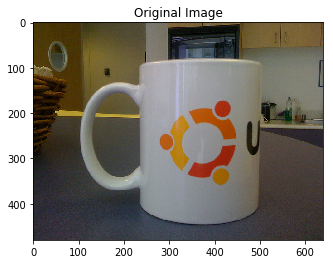

In [6]:
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image) # expect true color
plt.title('Original Image')
plt.show()

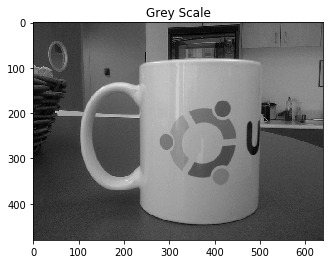

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.title('Grey Scale')
plt.show()

# Convolution
Run a simple convolution over some data

In [5]:
data = np.array([[0,105,0],[40,255,90],[0,55,0]])
G_x = sig.convolve2d(data, np.array([[-1],[0],[1]]), mode='valid') 
G_y = sig.convolve2d(data, np.array([[-1,0,1]]), mode='valid')
print(G_x)
print(G_y)

[[ 0 50  0]]
[[  0]
 [-50]
 [  0]]


# Image Processing Kernels
We can extend the convolution idea to perform specific types of processing operation

Identity kernel - this doesn't do anything

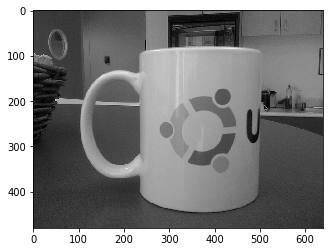

In [11]:
kernel = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])

output_image = sig.convolve2d(gray_image, kernel, mode='same') 
plt.imshow(output_image, cmap='gray');
plt.show()

Edge detection - note that we can use different kernels to detect different edges.

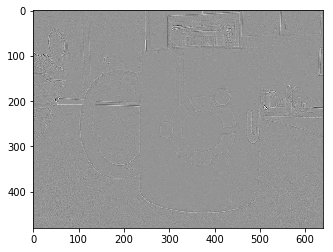

In [14]:
# kernel = np.array([[1, 0, -1],[0, 0, 0],[-1, 0, 1]])
# kernel = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

output_image = sig.convolve2d(gray_image, kernel, mode='same') 
plt.imshow(output_image, cmap='gray');
plt.show()

Sharpen kernel

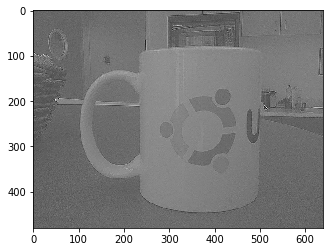

In [17]:
# kernel = np.array([[0, -1, 0],[-1, 1, -1],[0, -1, 0]])
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

output_image = sig.convolve2d(gray_image, kernel, mode='same') 
plt.imshow(output_image, cmap='gray');
plt.show()

Identity kernel - this doesn't do anything

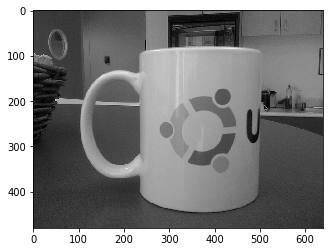

In [11]:
kernel = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])

output_image = sig.convolve2d(gray_image, kernel, mode='same') 
plt.imshow(output_image, cmap='gray');
plt.show()

Gaussian blur (3x3) approximation

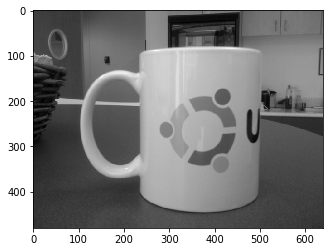

In [22]:
kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])

output_image = sig.convolve2d(gray_image, kernel, mode='same')
output_image = output_image / 9
plt.imshow(output_image, cmap='gray');
plt.show()

Sobel kernel

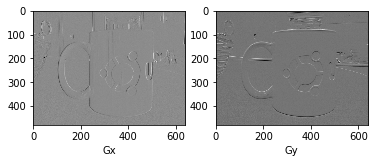

In [9]:
# Define the Sobel operator kernels.
kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

G_x = sig.convolve2d(gray_image, kernel_x, mode='same') 
G_y = sig.convolve2d(gray_image, kernel_y, mode='same') 

# Plot them!
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Actually plt.imshow() can handle the value scale well even if I don't do 
# the transformation (G_x + 255) / 2.
ax1.imshow((G_x + 255) / 2, cmap='gray'); ax1.set_xlabel("Gx")
ax2.imshow((G_y + 255) / 2, cmap='gray'); ax2.set_xlabel("Gy")
plt.show()